<h1>Problem Defination</h1>

<p>For this project we will investigate the Boston House Price dataset. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI
Machine Learning Repository 1 ): </p>
<li>CRIM: per capita crime rate by town</li>
<li>ZN: proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS: proportion of non-retail business acres per town</li>
<li>CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX: nitric oxides concentration (parts per 10 million)</li>
<li>RM: average number of rooms per dwelling</li>
<li>AGE: proportion of owner-occupied units built prior to 1940</li>
<li>etc</li>

<p>We can see that the input attributes have a mixture of units.</p>


<h3>Load the Dataset </h3>
<p>We can now load the dataset that you can download from the UCI Machine Learning
    repository website:<p> 
    https://archive.ics.uci.edu/ml/datasets/Housing

In [28]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

<h1>Analyze Data</h1>

In [29]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

<p>Let’s start by confirming the dimensions of the dataset, It return show the rows and columns</p>
<p>Let’s also look at the data types of each columns</p> 

In [30]:
# Descriptive statistics

# shape
print(dataset.shape)
set_option('display.max_rows', 500)
# types
print(dataset.dtypes)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


<p>Let’s summarize the distribution of each attribute.</p>

In [50]:
# descriptions, change precision to 3 places
set_option('precision', 1)
print(dataset.describe())
# class distribution
# print(dataset.groupby(60).size())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO      B  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0  506.0    506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5  408.2     18.5  356.7   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7  168.5      2.2   91.3   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0  187.0     12.6    0.3   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0  279.0     17.4  375.4   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0  330.0     19.1  391.4   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0  666.0     20.2  396.2   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0  711.0     22.0  396.9   

       LSTAT   MEDV  
count  506.0  506.0  
mean    12.7   22.5  
std      7.1    9.2  
min      1.7    5.0 

<p>Now, let’s now take a look at the correlation between all of the numeric attributes.</p>

In [51]:
# correlation
set_option('precision' , 2)
print(dataset.corr(method= 'pearson' ))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PTRATIO     B  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58     0.29 -0.39   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31    -0.39  0.18   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72     0.38 -0.36   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04    -0.12  0.05   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29    -0.36  0.13   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51     0.26 -0.27   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53    -0.23  0.29   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91     0.46 -0.44   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  

<h3>Data Visualizations</h3>

Let’s look at histograms of each
attribute to get a sense of the data distributions.

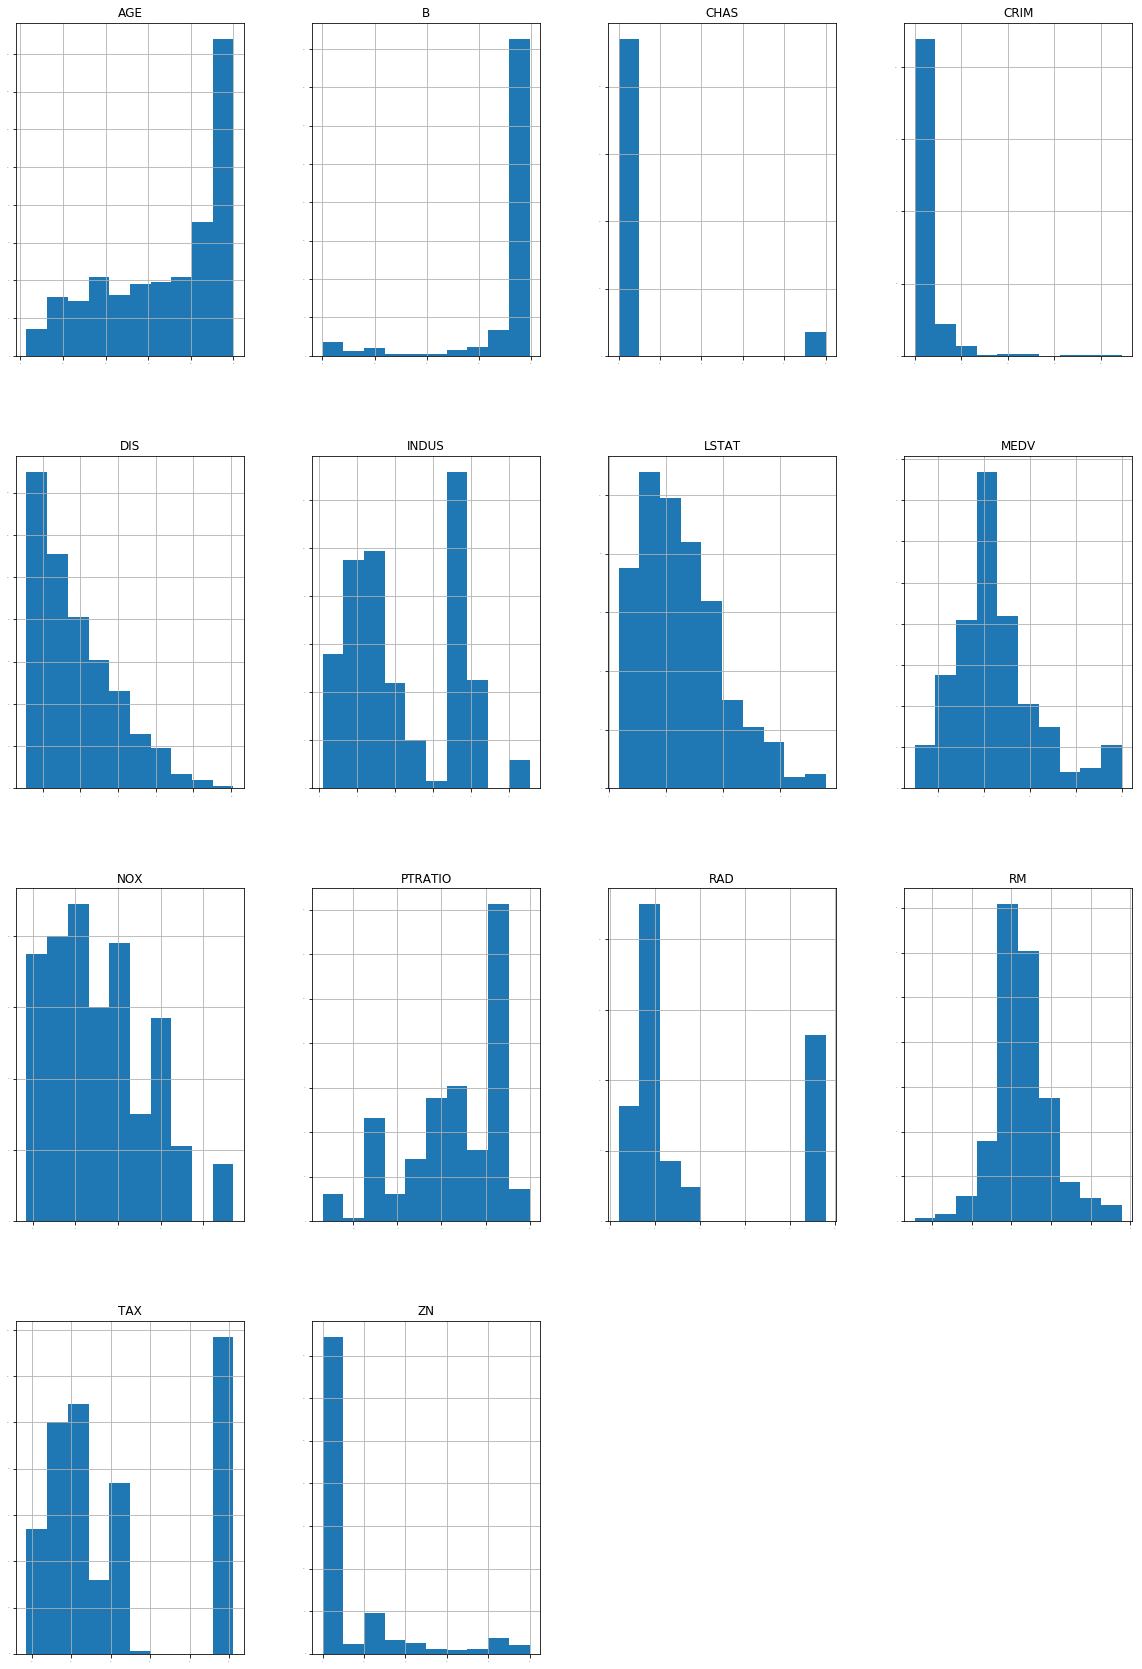

In [78]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
# pyplot.rcParams["figure.figsize"] = [16,20]
pyplot.show()

Let’s look at the same distributions using density plots that smooth them out a bit

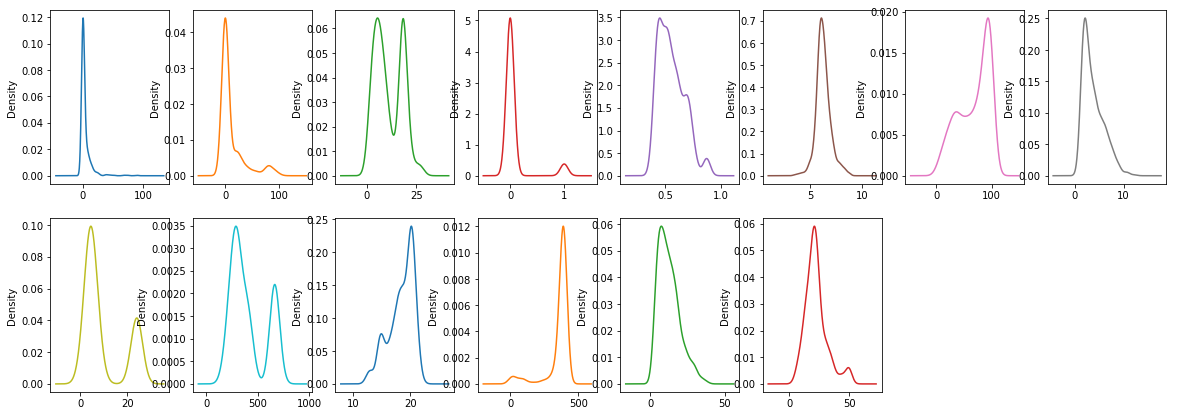

In [79]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()

Let’s look at the data with box and whisker plots of each attribute

CRIM           AxesSubplot(0.125,0.71587;0.168478x0.16413)
ZN          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
INDUS       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CHAS        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
NOX           AxesSubplot(0.125,0.518913;0.168478x0.16413)
RM         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
AGE        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
DIS        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RAD           AxesSubplot(0.125,0.321957;0.168478x0.16413)
TAX        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
PTRATIO    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
B          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
LSTAT            AxesSubplot(0.125,0.125;0.168478x0.16413)
MEDV          AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

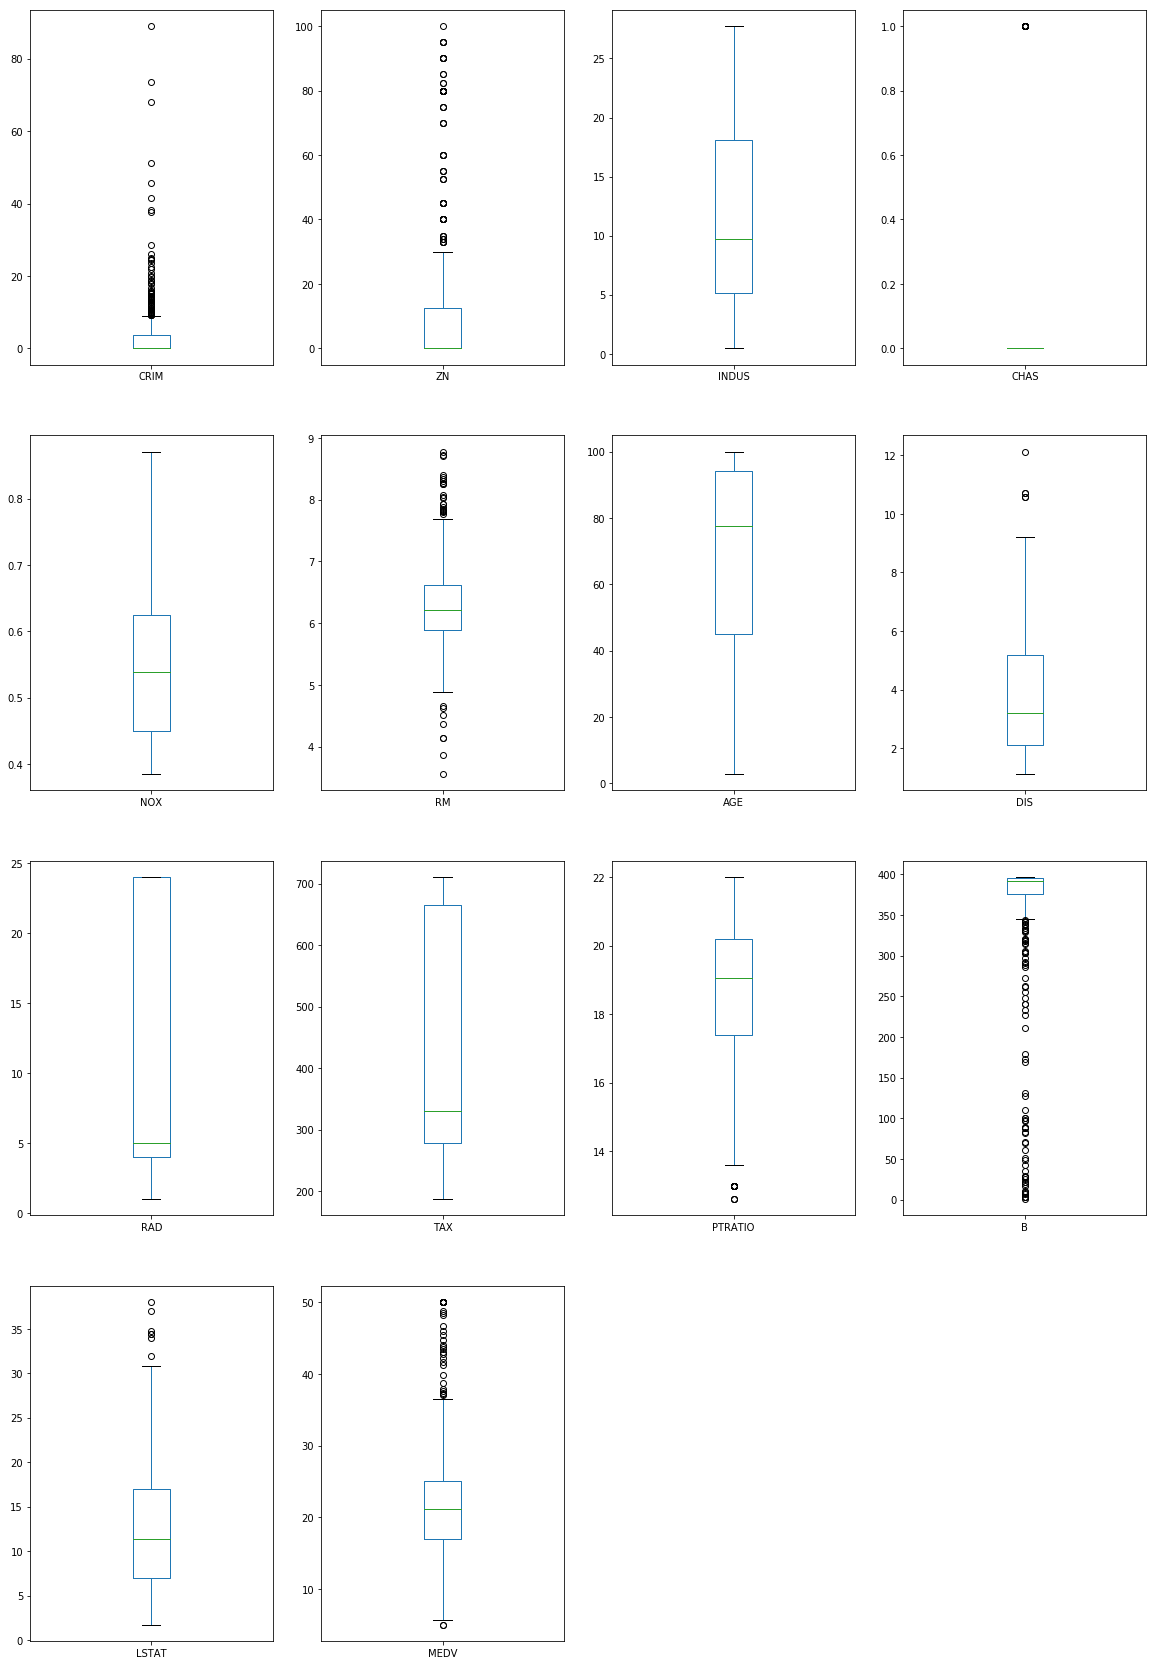

In [80]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
# pyplot.rcParams["figure.figsize"] = [16,20]
# pyplot.show()

<h3>Multimodal Data Visualizations </h3>

Some visualizations of the interactions between variables. The best place to start
is a scatter plot matrix.

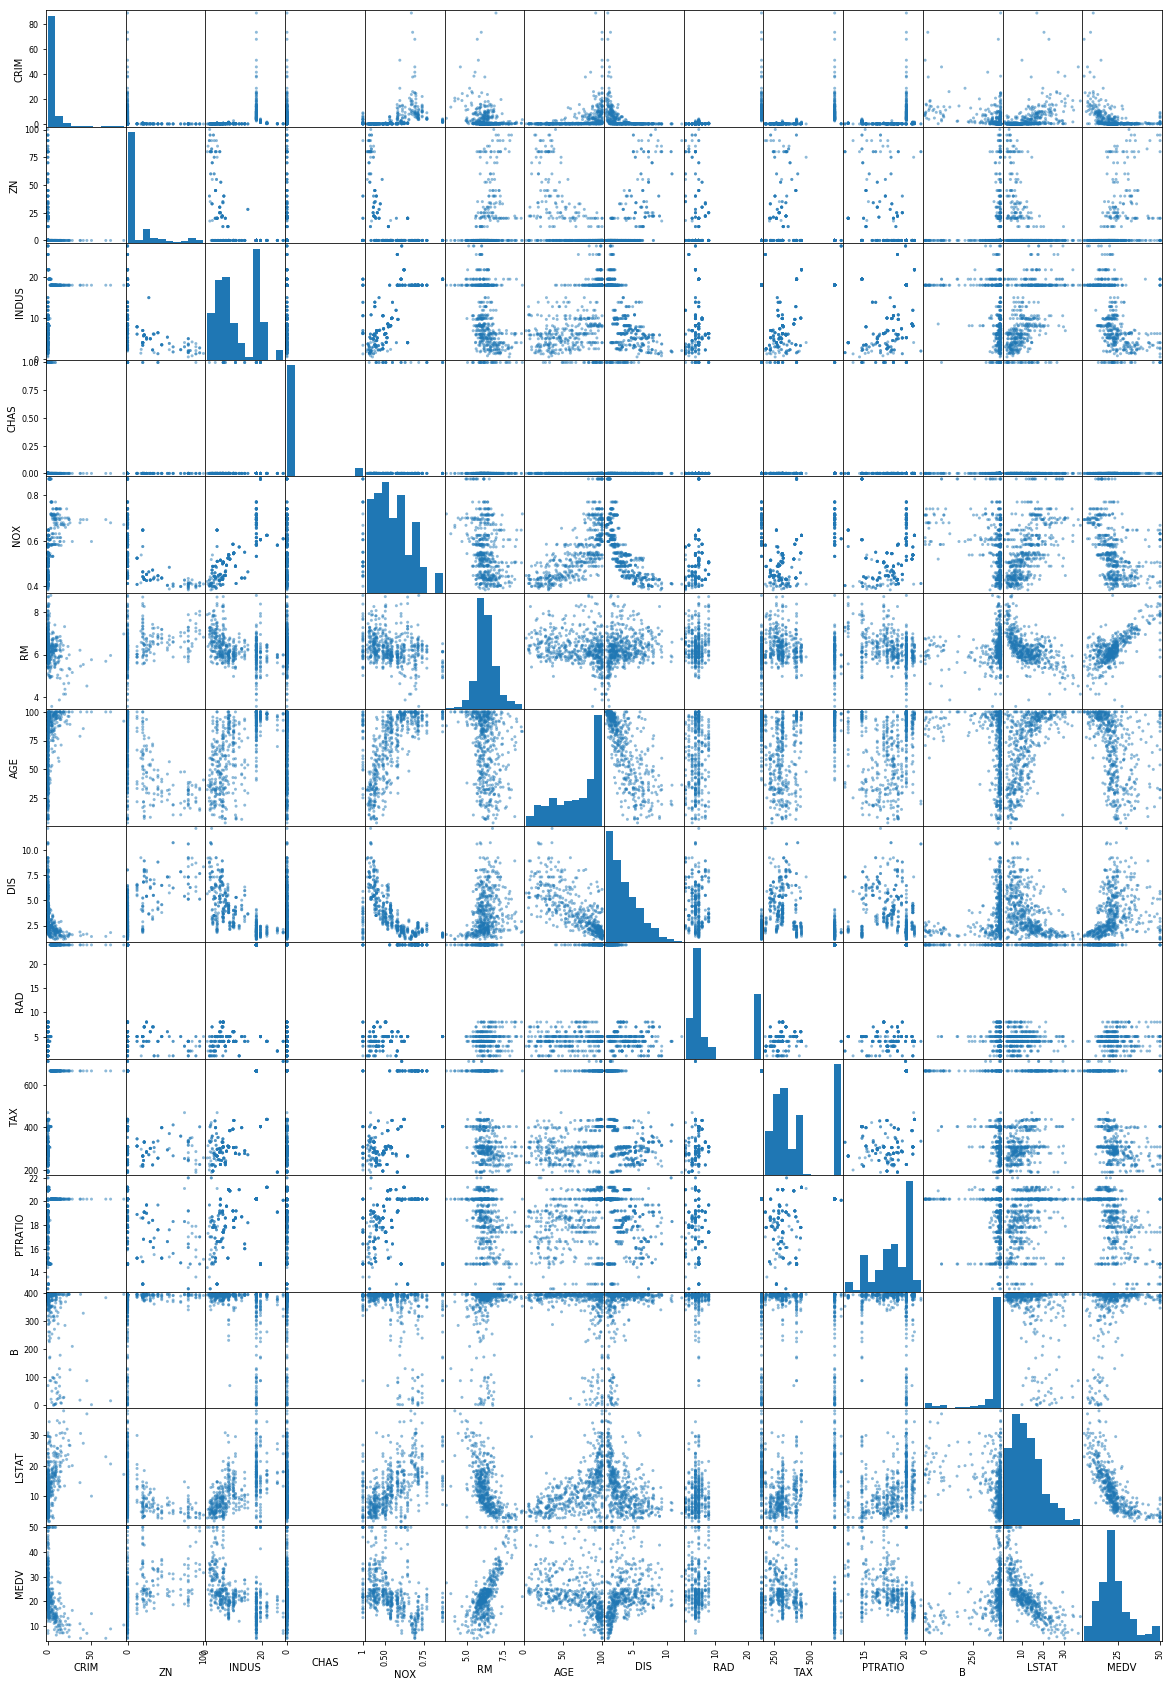

In [81]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

Let’s also visualize the correlations between the attributes.

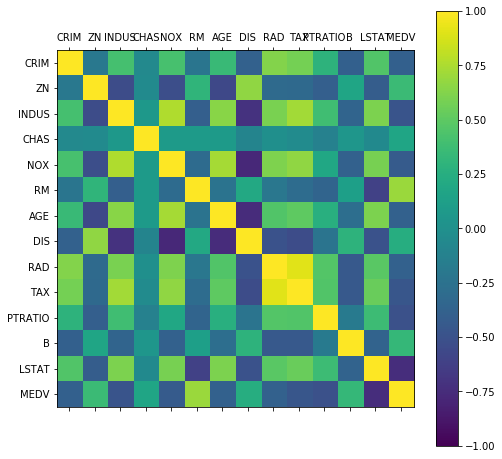

In [98]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.rcParams["figure.figsize"] = [8,8]
pyplot.show()

<h3> Validation Dataset </h3>

We will use 80% of the dataset for modeling and hold back 20% for validation.

In [102]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13].astype(float)
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<h3>Evaluate Algorithms: Baseline</h3>
<p>Right Now we have no idea how the algorithm will perform. Let’s design our test harness.</p>

<li>We will use 10-fold cross validation</li>
<li>We will evaluate algorithms using the Mean Squared Error (MSE) metric</li>
<li>MSE will give a gross idea of how wrong all predictions are (0 is perfect)</li>

In [107]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this regression
problem. The six algorithms selected include:

<ul>
    <li><b>Linear Algorithms:</b> Linear Regression (LR), Lasso Regression (LASSO)</li>
    <li><b>Nonlinear Algorithms:</b> Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).</li>
</ul>

Let’s compare the algorithms. We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.

In [108]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -23.423149 (10.163403)
SVR: -85.518342 (31.994798)


/home/purushottam/anaconda3/envs/ml/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/purushottam/anaconda3/envs/ml/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/purushottam/anaconda3/envs/ml/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/purushotta

In the above result it looks like the LR has the lowest MSW, followed by CART.

Now Let’s take a look at the distribution of scores across all cross validation folds by algorithm.

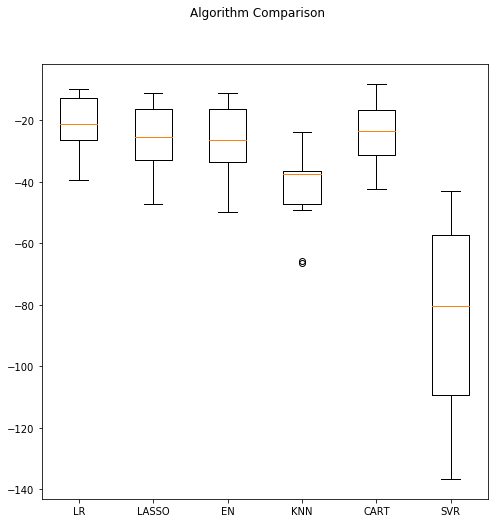

In [111]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3>Evaluate Algorithms: Standardization </h3>

Let’s evaluate the same algorithms with a standardized copy of the dataset by transforming data
 - We also need to avoid data leakage when we transform the data. 
 - To avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

Running the below code snippet provides a list of mean squared errors. We can see that scaling did
have an effect on KNN, driving the error lower than the other models.

In [112]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -23.237460 (7.607699)
ScaledSVR: -29.633086 (17.009186)


In the above result it looks like the **KNN** has the **lowest MSE**, followed by **LR**.

Let’s take a look at the distribution of the scores across the cross validation folds.

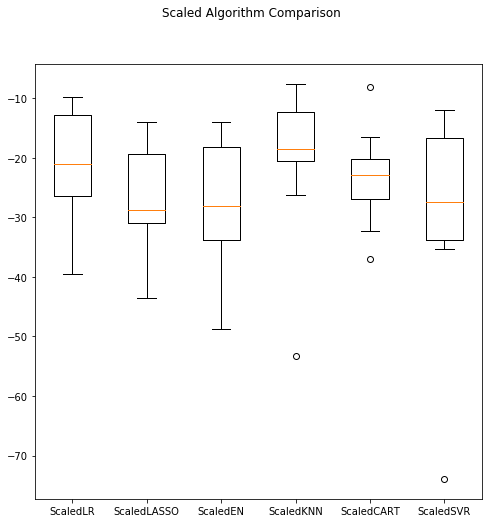

In [113]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3> Improve Results With Tuning</h3>

We know from the results in the previous section that KNN achieves good results on a scaled
version of the dataset. 

The default value for the number of neighbors in KNN is 7. 
We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. 

The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. 
Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [114]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/home/purushottam/anaconda3/envs/ml/lib/python3.5/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We can display the mean and standard deviation scores as well as the best performing value for **k** below.

In [122]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


In the above result you can see that the best for **k (n neighbors) is 3 providing a mean squared error of -18.172137**, the best so far.

<h3> Finalize Model</h3>

First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [124]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
modelKNN = KNeighborsRegressor(n_neighbors=3)
model.fit(rescaledX, Y_train)
modelKNN.fit(rescaledX, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [125]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))
knn_predictions = modelKNN.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, knn_predictions))

11.878916447820348
33.187407407407406


<h1>Summary